In [1]:
import os

import cv2
import numpy as np
import torch
from matplotlib import pyplot as plt
from PIL import Image

from mltranslator import PROJECT_DIR
from mltranslator.modules.detection import TextDetector

In [2]:
# model_path = os.path.join(PROJECT_DIR, "mltranslator/models/detection/best.pt")
text_detector = TextDetector(
    # use parameter below to load custom model
    # yolo_model_path=model_path
)

In [3]:
image_path = f"{PROJECT_DIR}/dataset/test/test.jpg"
image = Image.open(image_path).convert("RGB")

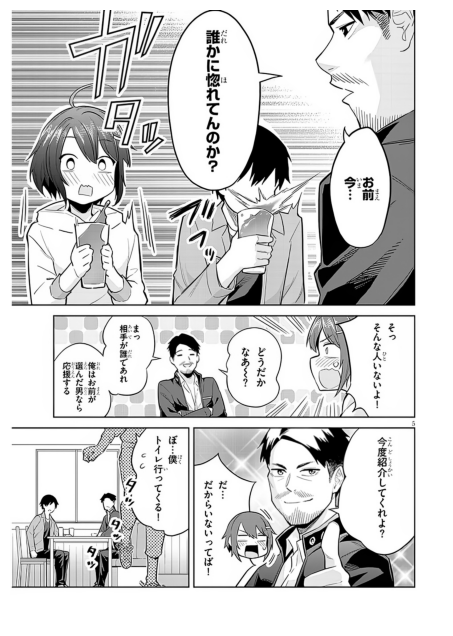

In [4]:
# show image
fig, _ = plt.subplots(1,1, figsize=(8,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
plt.show()

In [5]:
debug_image, cropped_images = text_detector.get_output_and_cropped_images(image)
result_api = text_detector.get_detect_output_api(image)

# show bounding box result
display(result_api)

[(123, 0, 349, 334),
 (433, 39, 490, 372),
 (746, 371, 833, 434),
 (352, 417, 469, 573),
 (809, 700, 871, 900),
 (241, 705, 294, 844),
 (515, 755, 578, 853),
 (114, 787, 204, 906),
 (311, 953, 389, 1152),
 (820, 957, 862, 1192),
 (429, 1054, 491, 1274)]

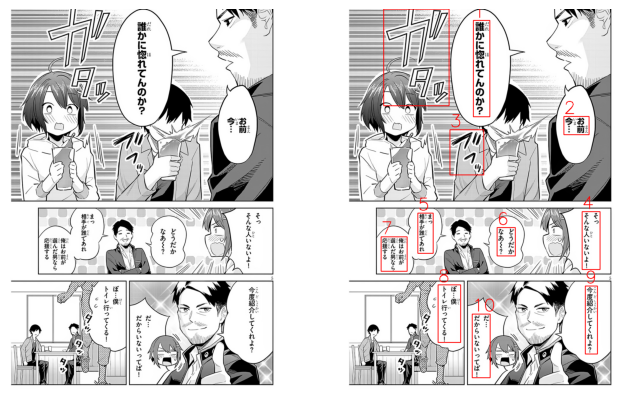

In [6]:
fig, _ = plt.subplots(1,2, figsize=(8,8))
fig.axes[0].imshow(image)
fig.axes[0].axis("off")
fig.axes[1].imshow(debug_image)
fig.axes[1].axis("off")
plt.show()

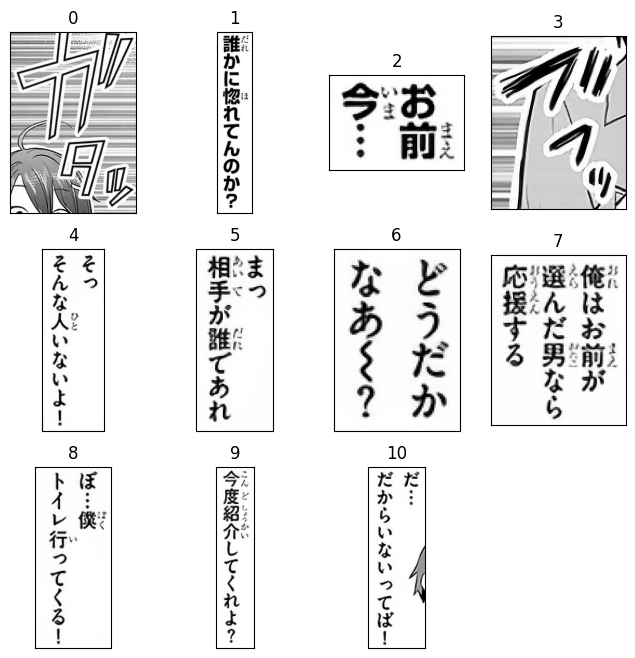

In [7]:
r = int(np.sqrt(len(cropped_images)))
c = int(np.round(len(cropped_images)/r))
fig, _ = plt.subplots(r,c, figsize=(8,8))
for i, ax in enumerate(fig.axes):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if i >= len(cropped_images):
        ax.axis("off")
        continue
    ax.set_title(i)
    ax.imshow(cropped_images[i])

    
plt.show()